# Step 1: Creating Tokens

In [126]:
with open("data/the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

print('total number of charactoer:', len(raw_text))
print(raw_text[:99])

total number of charactoer: 20479
I HAD always thought Jack Gisburn rather a cheap genius--though a good fellow enough--so it was no 


In [127]:
import re

text = "Hello, world. This, is a test."
result = re.split(r'(\s)', text)

print(result)

['Hello,', ' ', 'world.', ' ', 'This,', ' ', 'is', ' ', 'a', ' ', 'test.']


In [ ]:
result = re.split(r'([,.]|\s)', text)
print(result)

['Hello', ',', '', ' ', 'world', '.', '', ' ', 'This', ',', '', ' ', 'is', ' ', 'a', ' ', 'test', '.', '']


In [129]:
# 这一步在这里是为了简单起见，并不是llm处理文本都要删除空格，
# 内存足够为了追求训练效果可以选择不删除
result = [item for item in result if item.strip()] 
print(result)

['Hello', ',', 'world', '.', 'This', ',', 'is', 'a', 'test', '.']


In [130]:
preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', raw_text)
preprocessed = [item for item in  preprocessed]
print(preprocessed[:30])


['I', ' ', 'HAD', ' ', 'always', ' ', 'thought', ' ', 'Jack', ' ', 'Gisburn', ' ', 'rather', ' ', 'a', ' ', 'cheap', ' ', 'genius', '--', 'though', ' ', 'a', ' ', 'good', ' ', 'fellow', ' ', 'enough', '--']


# Step 2:Creating Token IDs

In [131]:
all_words = sorted(set(preprocessed))
vocab_size = len(all_words)

print(vocab_size)

1133


In [132]:
vocab = {token:integer for integer,token in enumerate(all_words)}

for i,item in enumerate(vocab.items()):
    print(item)
    if i >= 50:
        break

('', 0)
('\n', 1)
(' ', 2)
('!', 3)
('"', 4)
("'", 5)
('(', 6)
(')', 7)
(',', 8)
('--', 9)
('.', 10)
(':', 11)
(';', 12)
('?', 13)
('A', 14)
('Ah', 15)
('Among', 16)
('And', 17)
('Are', 18)
('Arrt', 19)
('As', 20)
('At', 21)
('Be', 22)
('Begin', 23)
('Burlington', 24)
('But', 25)
('By', 26)
('Carlo', 27)
('Chicago', 28)
('Claude', 29)
('Come', 30)
('Croft', 31)
('Destroyed', 32)
('Devonshire', 33)
('Don', 34)
('Dubarry', 35)
('Emperors', 36)
('Florence', 37)
('For', 38)
('Gallery', 39)
('Gideon', 40)
('Gisburn', 41)
('Gisburns', 42)
('Grafton', 43)
('Greek', 44)
('Grindle', 45)
('Grindles', 46)
('HAD', 47)
('Had', 48)
('Hang', 49)
('Has', 50)


In [ ]:
# Tokenizer: mapping from tokens tokenIDs
class SimpleTokenizerV1:
    def __init__(self, vocab):
        self.int_to_str = {i:s for s,i in vocab.items()} # 便利字典用 .item()
        self.str_to_int = vocab
    
    def encode(self, text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)

        preprocessed = [
            item for item in preprocessed if item.strip()
            # item for item in preprocessed
        ]

        ids = [self.str_to_int[s] for s in preprocessed]
        return ids
    
    def decode(self, ids):
        puncts = {',', '.', ':', ';', '?', '_', '!', '"', '(', ')', "'"}
        tokens = [self.int_to_str[i] for i in ids]
        text = ''.join(f' {token}' if token not in puncts else token for token in tokens)
        return text

tokenizer = SimpleTokenizerV1(vocab)
text = """
"Money's only excuse is to put beauty into circulation," was one of the axioms he laid down across the Sevres and silver of an exquisitely appointed luncheon-table, when, on a later day, I had again run over from Monte Carlo; and Mrs. Gisburn, beaming on him, added for my enlightenment: "Jack is so morbidly sensitive to every form of beauty."

Poor Jack! It had always been his fate to have women say such things of him: the fact should be set down in extenuation. What struck me now was that, for the first time, he resented the tone. I had seen him, so often, basking under similar tributes--was it the conjugal note that robbed them of their savour? No--for, oddly enough, it became apparent that he was fond of Mrs. Gisburn--fond enough not to see her absurdity. It was his own absurdity he seemed to be wincing under--his own attitude as an object for garlands and incense.

"""
ids = tokenizer.encode(text)
print(len(ids))
print(ids)

text_pre = tokenizer.decode(ids)
print(text_pre)
    

387
[0, 1, 0, 4, 66, 5, 853, 2, 734, 2, 409, 2, 587, 2, 1019, 2, 809, 2, 206, 2, 582, 2, 268, 8, 0, 4, 0, 2, 1080, 2, 732, 2, 725, 2, 991, 2, 192, 2, 536, 2, 601, 2, 365, 2, 130, 2, 991, 2, 90, 2, 160, 2, 893, 2, 725, 2, 159, 2, 414, 2, 171, 2, 654, 8, 0, 2, 1093, 8, 0, 2, 730, 2, 118, 2, 607, 2, 318, 8, 0, 2, 56, 2, 517, 2, 143, 2, 852, 2, 744, 2, 480, 2, 67, 2, 27, 12, 0, 2, 160, 2, 70, 10, 0, 2, 41, 8, 0, 2, 202, 2, 730, 2, 549, 8, 0, 2, 133, 2, 459, 2, 700, 2, 394, 11, 0, 2, 0, 4, 60, 2, 587, 2, 911, 2, 687, 2, 871, 2, 1019, 2, 406, 2, 467, 2, 725, 2, 206, 10, 0, 4, 0, 1, 0, 1, 83, 2, 60, 3, 0, 2, 59, 2, 517, 2, 152, 2, 211, 2, 552, 2, 434, 2, 1019, 2, 533, 2, 1115, 2, 859, 2, 952, 2, 1000, 2, 725, 2, 549, 11, 0, 2, 991, 2, 423, 2, 882, 2, 201, 2, 874, 2, 365, 2, 571, 2, 415, 10, 0, 2, 112, 2, 946, 2, 666, 2, 717, 2, 1080, 2, 990, 8, 0, 2, 459, 2, 991, 2, 445, 2, 1014, 8, 0, 2, 536, 2, 840, 2, 991, 2, 1021, 10, 0, 2, 56, 2, 517, 2, 867, 2, 549, 8, 0, 2, 911, 2, 727, 8, 0, 2, 199, 2

# Add Special Context Tokens

In [134]:
# 结束标记和未知标记
all_tokens = sorted(list(set(preprocessed)))
all_tokens.extend(["<|endoftext|>", "<|unk|>"])
print(all_tokens[-5:])
print(len(all_tokens))

['younger', 'your', 'yourself', '<|endoftext|>', '<|unk|>']
1135


In [142]:
# enumerate字典迭代
vocab = {token:integer for integer, token in enumerate(all_tokens)}
print(vocab)

{'': 0, '\n': 1, ' ': 2, '!': 3, '"': 4, "'": 5, '(': 6, ')': 7, ',': 8, '--': 9, '.': 10, ':': 11, ';': 12, '?': 13, 'A': 14, 'Ah': 15, 'Among': 16, 'And': 17, 'Are': 18, 'Arrt': 19, 'As': 20, 'At': 21, 'Be': 22, 'Begin': 23, 'Burlington': 24, 'But': 25, 'By': 26, 'Carlo': 27, 'Chicago': 28, 'Claude': 29, 'Come': 30, 'Croft': 31, 'Destroyed': 32, 'Devonshire': 33, 'Don': 34, 'Dubarry': 35, 'Emperors': 36, 'Florence': 37, 'For': 38, 'Gallery': 39, 'Gideon': 40, 'Gisburn': 41, 'Gisburns': 42, 'Grafton': 43, 'Greek': 44, 'Grindle': 45, 'Grindles': 46, 'HAD': 47, 'Had': 48, 'Hang': 49, 'Has': 50, 'He': 51, 'Her': 52, 'Hermia': 53, 'His': 54, 'How': 55, 'I': 56, 'If': 57, 'In': 58, 'It': 59, 'Jack': 60, 'Jove': 61, 'Just': 62, 'Lord': 63, 'Made': 64, 'Miss': 65, 'Money': 66, 'Monte': 67, 'Moon-dancers': 68, 'Mr': 69, 'Mrs': 70, 'My': 71, 'Never': 72, 'No': 73, 'Now': 74, 'Nutley': 75, 'Of': 76, 'Oh': 77, 'On': 78, 'Once': 79, 'Only': 80, 'Or': 81, 'Perhaps': 82, 'Poor': 83, 'Professional':

In [151]:
class SimpleTokenizerV2:
    def __init__(self, vocab):
        self.str_to_int = vocab
        self.int_to_str = { i:s for s,i in vocab.items()}
    
    def encode(self, text):
        preprocessed = re.split(r'([,.:;?_!"()\']|--|\s)', text)
        preprocessed = [item for item in preprocessed if item.strip()]
        preprocessed = [
            item if item in self.str_to_int
            else "<|unk|>" for item in preprocessed
        ]

        ids = [self.str_to_int[s] for s in preprocessed]
        return ids
    
    def decode(self, ids):
        puncts = {',', '.', ':', ';', '?', '_', '!', '"', '(', ')', "'"}
        tokens = [self.int_to_str[i] for i in ids]
        text = ''.join(f' {token}' if token not in puncts else token for token in tokens)
        return text
        

In [152]:
tokenizer = SimpleTokenizerV2(vocab)
text1 = "Hello, do you like tea?"
text2 = "Peace and Love."

text = " <|endoftext|> ".join((text1, text2))
print(text)

print(tokenizer.encode(text))

Hello, do you like tea? <|endoftext|> Peace and Love.
[1134, 8, 358, 1129, 631, 978, 13, 1133, 1134, 160, 1134, 10]


In [153]:
tokenizer.decode(tokenizer.encode(text)) 

' <|unk|>, do you like tea? <|endoftext|> <|unk|> and <|unk|>.'

# Byte Pair Encoding（BPE）
a case of sub-word base tokenization

In [ ]:
import importlib
import importlib.metadata
import tiktoken
 
print("tiktoken version:", importlib.metadata.version("tiktoken")) 

tiktoken version: 0.9.0


In [42]:
tokenizer = tiktoken.encoding_for_model('gpt2')

In [43]:
text = (
    "Hello, do you like tea? <|endoftext|> In the sunlit terraces"
    "of someknownPlace."
)

integers = tokenizer.encode(text, allowed_special={"<|endoftext|>"})

print(len(integers))
print(integers)

20
[15496, 11, 466, 345, 588, 8887, 30, 220, 50256, 554, 262, 4252, 18250, 8812, 2114, 1659, 617, 4002, 27271, 13]


In [44]:
tokens = "|".join([tokenizer.decode([id]) for id in integers])
tokens

'Hello|,| do| you| like| tea|?| |<|endoftext|>| In| the| sun|lit| terr|aces|of| some|known|Place|.'

In [45]:
integers = tokenizer.encode("baga")
print(integers)

tokens = "|".join(tokenizer.decode([id]) for id in integers)
print(tokens)

[65, 8126]
b|aga


# DataSet & DataLoader

In [53]:
tokenizer = tiktoken.encoding_for_model("gpt2")

In [54]:
with open("data/the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

enc_text = tokenizer.encode(raw_text)
print(len(enc_text))

5145


In [55]:
enc_sample = enc_text[50:]
print(enc_sample)

[290, 4920, 2241, 287, 257, 4489, 64, 319, 262, 34686, 41976, 13, 357, 10915, 314, 2138, 1807, 340, 561, 423, 587, 10598, 393, 28537, 2014, 198, 198, 1, 464, 6001, 286, 465, 13476, 1, 438, 5562, 373, 644, 262, 1466, 1444, 340, 13, 314, 460, 3285, 9074, 13, 46606, 536, 5469, 438, 14363, 938, 4842, 1650, 353, 438, 2934, 489, 3255, 465, 48422, 540, 450, 67, 3299, 13, 366, 5189, 1781, 340, 338, 1016, 284, 3758, 262, 1988, 286, 616, 4286, 705, 1014, 510, 26, 475, 314, 836, 470, 892, 286, 326, 11, 1770, 13, 8759, 2763, 438, 1169, 2994, 284, 943, 17034, 318, 477, 314, 892, 286, 526, 383, 1573, 11, 319, 9074, 13, 536, 5469, 338, 11914, 11, 33096, 663, 4808, 3808, 62, 355, 996, 484, 547, 12548, 287, 281, 13079, 410, 12523, 286, 22353, 13, 843, 340, 373, 407, 691, 262, 9074, 13, 536, 48819, 508, 25722, 276, 13, 11161, 407, 262, 40123, 18113, 544, 9325, 701, 11, 379, 262, 938, 402, 1617, 261, 12917, 905, 11, 5025, 502, 878, 402, 271, 10899, 338, 366, 31640, 12, 67, 20811, 1, 284, 910, 11, 351, 10

In [56]:
context_size = 4
# 注意上下文和输入大小
x = enc_sample[:context_size]
y = enc_sample[1:context_size+1]

print(f"x: {x}")
print(f"y:      {y}")

x: [290, 4920, 2241, 287]
y:      [4920, 2241, 287, 257]


In [57]:
for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]

    print(context, "--->", desired)

[290] ---> 4920
[290, 4920] ---> 2241
[290, 4920, 2241] ---> 287
[290, 4920, 2241, 287] ---> 257


In [61]:
for i in range(1, context_size+1):
    context = enc_sample[:i]
    desired = enc_sample[i]

    print(tokenizer.decode(context), "--->", tokenizer.decode([desired]))

 and --->  established
 and established --->  himself
 and established himself --->  in
 and established himself in --->  a


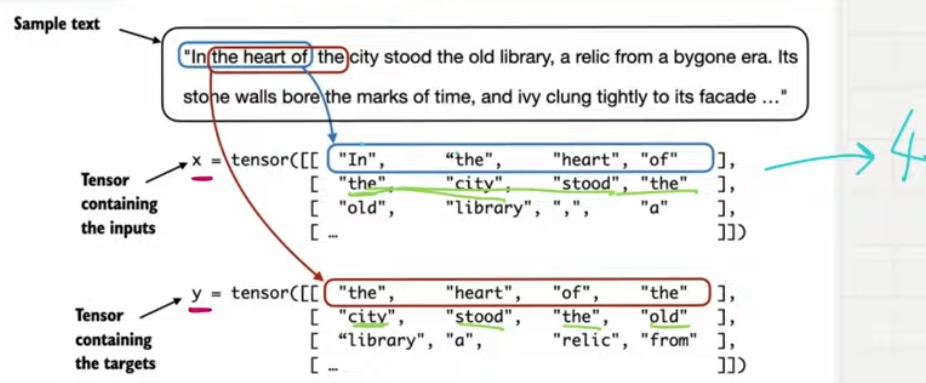

<div class="alert alert-block alert-warning">
<b>Example:</b> Use yellow boxes for examples that are not 
inside code cells, or use for mathematical formulas if needed.
</div>

<div class="alert alert-block alert-info">
<b>Tip:</b> Use blue boxes (alert-info) for tips and notes. 
If it’s a note, you don’t have to include the word “Note”.
</div>

<div class="alert alert-block alert-success">
<b>Up to you:</b> Use green boxes sparingly, and only for some specific 
purpose that the other boxes can't cover. For example, if you have a lot 
of related content to link to, maybe you decide to use green boxes for 
related links from each section of a notebook.
</div>

<div class="alert alert-block alert-danger">
<b>Just don't:</b> In general, avoid the red boxes. These should only be
used for actions that might cause data loss or another major issue.
</div>

In [23]:
from torch.utils.data import Dataset, DataLoader
import torch


class GPTDataSetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []
    
        token_ids = tokenizer.encode(txt, allowed_special={"<|endoftext|>"})

        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i + 1 : i + max_length +1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))
        
    def __len__(self):
        return len(self.input_ids)
    
    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]
    

<div class="alert alert-block alert-info">
<b>Tip:</b> 

Step 1: Initialize the tokenizer

Step 2: Create dataset

Step 3: drop_last=True drops the last batch if it is shorter than the specified batch_size to prevent loss spikes during training

Step 4: The number of CPU processes to use for preprocessing

</div>

In [24]:
import tiktoken

def create_dataloader_v1(txt, batch_size=4, max_length=256,
                         stride=128, shuffle=True, drop_last=True,
                         num_workers=0):
    tokenizer = tiktoken.get_encoding("gpt2")

    dataset = GPTDataSetV1(txt, tokenizer, max_length, stride)

    dataloader = DataLoader(
        dataset,
        batch_size = batch_size,
        shuffle = shuffle,
        drop_last = drop_last,
        num_workers = num_workers
    )

    return dataloader

In [25]:
with open("data/the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

In [26]:
print("PyTorch version:", torch.__version__)
dataloader = create_dataloader_v1(
    raw_text, batch_size=1, max_length=4, stride=1, shuffle=False, 
    num_workers=8
)

data_iter = iter(dataloader)
first_batch = next(data_iter)
print(first_batch)

PyTorch version: 2.6.0+cu124
[tensor([[  40,  367, 2885, 1464]]), tensor([[ 367, 2885, 1464, 1807]])]


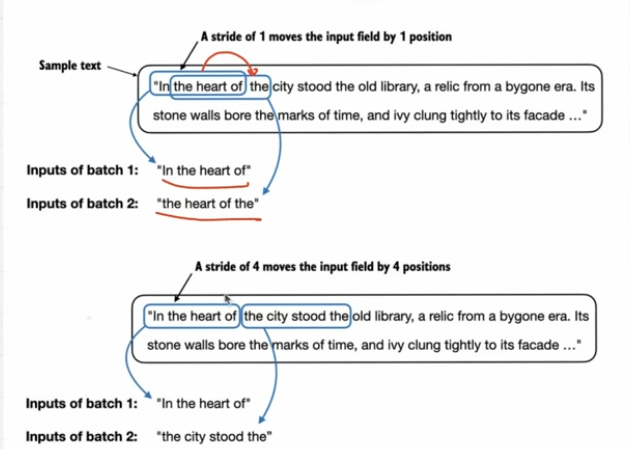

In [27]:
second_batch = next(data_iter)
print(second_batch)

[tensor([[ 367, 2885, 1464, 1807]]), tensor([[2885, 1464, 1807, 3619]])]


In [28]:
dataloader = create_dataloader_v1(
    raw_text, batch_size=8, max_length=4, stride=4, shuffle=False,num_workers=8
)

data_iter = iter(dataloader)
inputs, targets = next(data_iter)
print("Inputs:\n", inputs)
print("\nOutputs:\n", targets)

Inputs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Outputs:
 tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922],
        [ 5891,  1576,   438,   568],
        [  340,   373,   645,  1049],
        [ 5975,   284,   502,   284],
        [ 3285,   326,    11,   287]])


# Token Embedding：word2vector


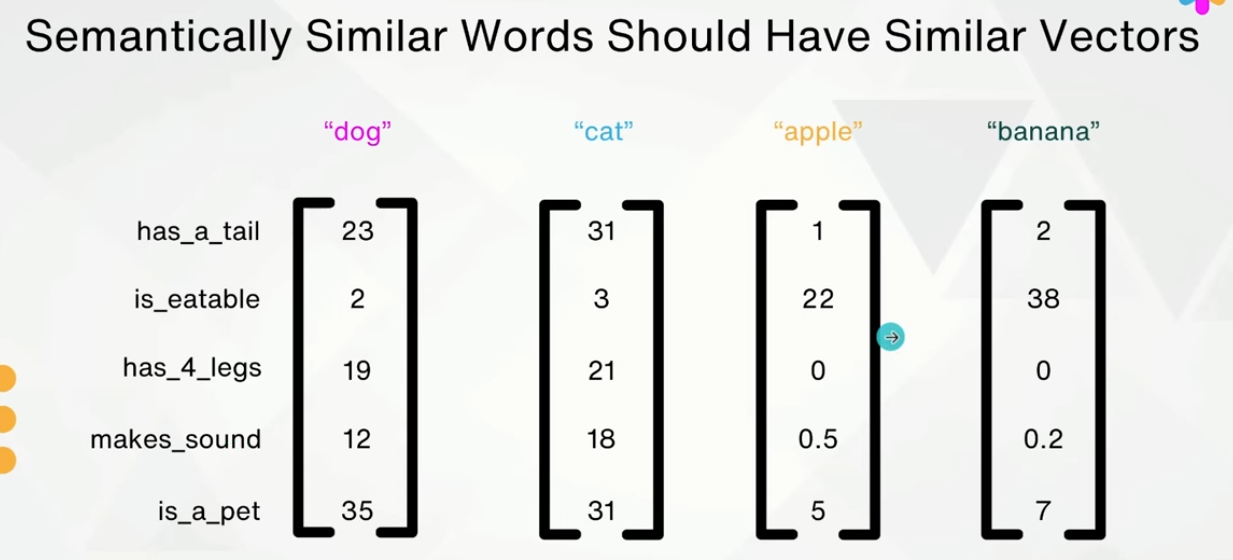

In [1]:
import gensim.downloader as api

model = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [7]:
# 每个词都被分配了300维的向量

word_vectors = model
print(word_vectors['computer'])

[ 1.07421875e-01 -2.01171875e-01  1.23046875e-01  2.11914062e-01
 -9.13085938e-02  2.16796875e-01 -1.31835938e-01  8.30078125e-02
  2.02148438e-01  4.78515625e-02  3.66210938e-02 -2.45361328e-02
  2.39257812e-02 -1.60156250e-01 -2.61230469e-02  9.71679688e-02
 -6.34765625e-02  1.84570312e-01  1.70898438e-01 -1.63085938e-01
 -1.09375000e-01  1.49414062e-01 -4.65393066e-04  9.61914062e-02
  1.68945312e-01  2.60925293e-03  8.93554688e-02  6.49414062e-02
  3.56445312e-02 -6.93359375e-02 -1.46484375e-01 -1.21093750e-01
 -2.27539062e-01  2.45361328e-02 -1.24511719e-01 -3.18359375e-01
 -2.20703125e-01  1.30859375e-01  3.66210938e-02 -3.63769531e-02
 -1.13281250e-01  1.95312500e-01  9.76562500e-02  1.26953125e-01
  6.59179688e-02  6.93359375e-02  1.02539062e-02  1.75781250e-01
 -1.68945312e-01  1.21307373e-03 -2.98828125e-01 -1.15234375e-01
  5.66406250e-02 -1.77734375e-01 -2.08984375e-01  1.76757812e-01
  2.38037109e-02 -2.57812500e-01 -4.46777344e-02  1.88476562e-01
  5.51757812e-02  5.02929

In [ ]:
print(word_vectors['cat'].shape)

(300,)


THINK: King + Woman - Man = ? 

In [ ]:
print(
    word_vectors.most_similar(positive=['king','woman'], negative=['man'],
                              topn =10)
)

# 对单词向量的计算，实际上是对词的含义的计算

[('queen', 0.7118191123008728), ('monarch', 0.6189674735069275), ('princess', 0.5902430415153503), ('crown_prince', 0.5499458909034729), ('prince', 0.5377322435379028), ('kings', 0.5236843824386597), ('Queen_Consort', 0.5235945582389832), ('queens', 0.5181134939193726), ('sultan', 0.5098593235015869), ('monarchy', 0.5087411403656006)]


In [16]:
print(word_vectors.similarity('woman', 'man'))
print(word_vectors.similarity('dog', 'cat'))
print(word_vectors.similarity('Chinese', 'China'))
print(word_vectors.similarity('boy', 'girl'))
print(word_vectors.similarity('sky', 'vector'))

0.7664013
0.76094574
0.7678081
0.8543272
0.082758665


In [22]:
print(word_vectors.most_similar('tower', topn=5))

[('towers', 0.8531750440597534), ('skyscraper', 0.641742467880249), ('Tower', 0.639177143573761), ('spire', 0.594687819480896), ('responded_Understood_Atlasjet', 0.5931612849235535)]


<div class="alert alert-block alert-warning">
<b>embedding weight matrix
</div>

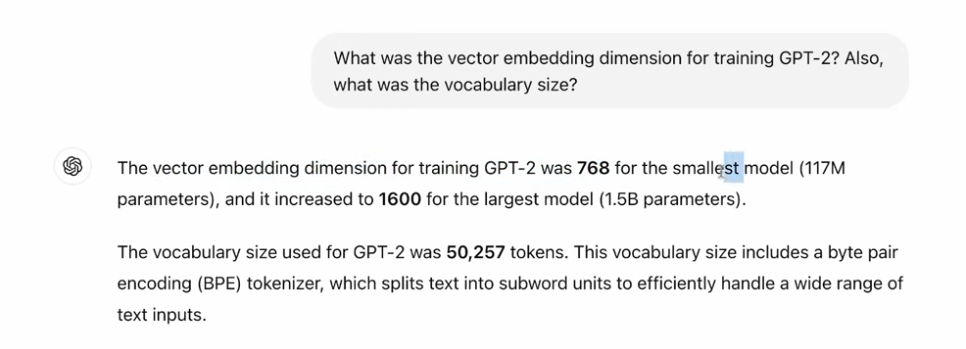

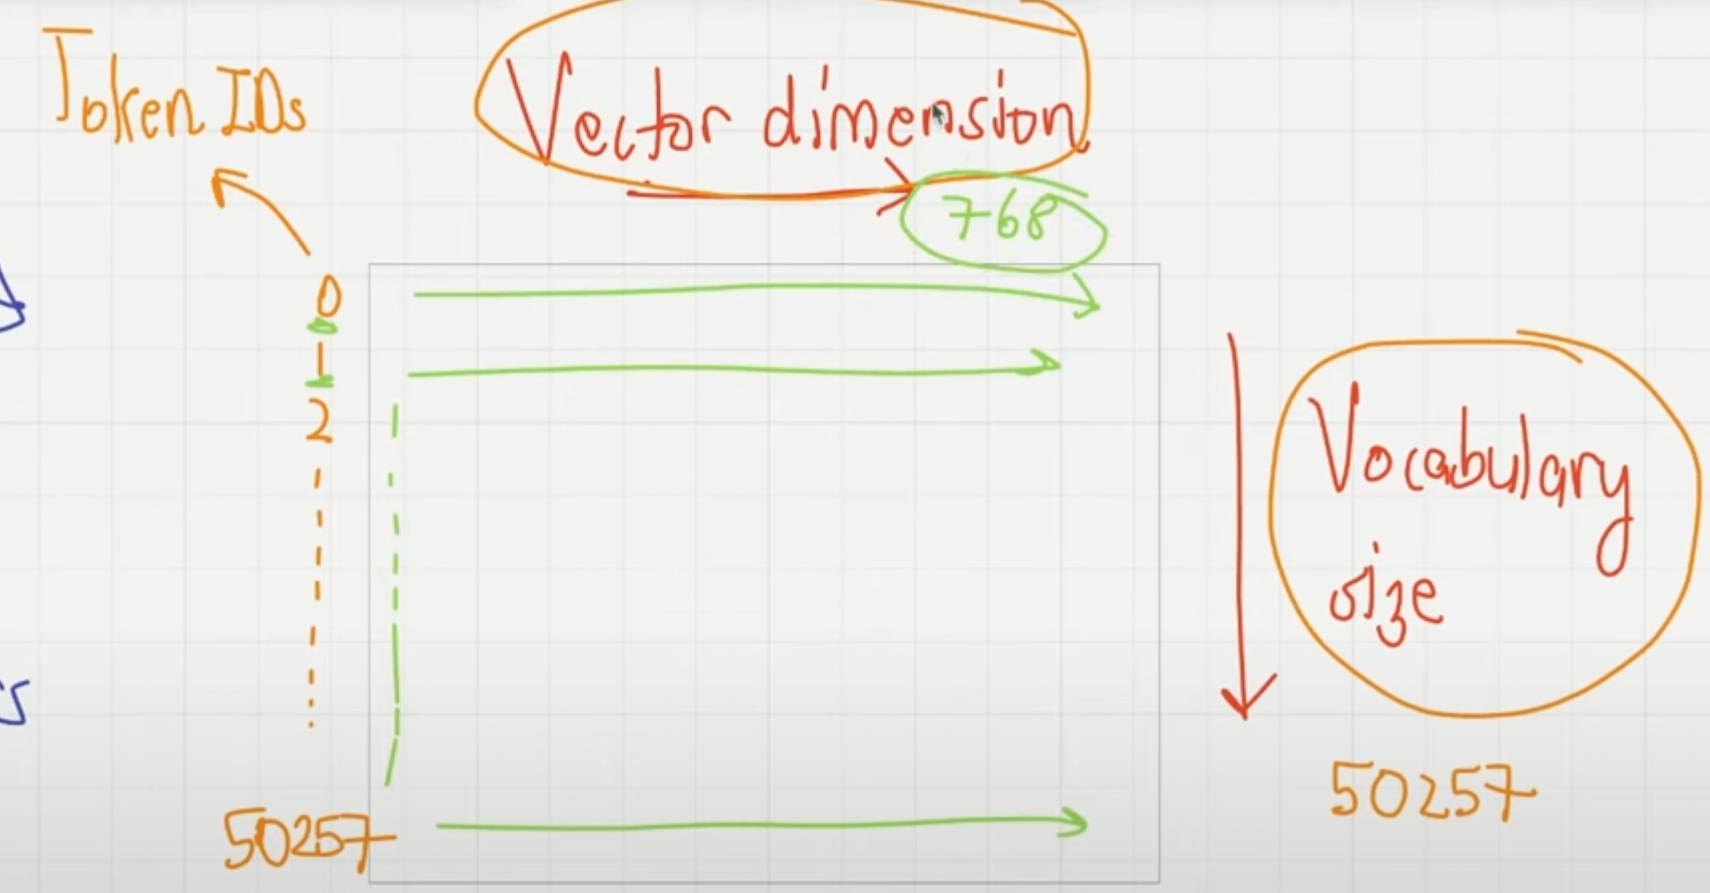

In [23]:
print(api.BASE_DIR)

/home/wangjz/gensim-data


在向量权重矩阵中有两个维度：vocab_size（单词总数） & vector_dim（每个单词的特征数）

有两个网络在同时训练，嵌入网络， 预测网络

In [32]:
import torch

vocab_size = 6
output_dim = 3

torch.manual_seed(432)
embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

In [33]:
print(embedding_layer.weight)

Parameter containing:
tensor([[ 0.9048, -0.5662,  0.1304],
        [-1.4061, -1.4984,  0.7268],
        [-0.4058, -0.3844,  0.5833],
        [ 0.1817, -0.0851, -0.1931],
        [-0.0602, -1.1942,  0.3909],
        [ 0.8327,  0.2988, -0.0331]], requires_grad=True)


In [34]:
print(embedding_layer(torch.tensor([3])))

tensor([[ 0.1817, -0.0851, -0.1931]], grad_fn=<EmbeddingBackward0>)


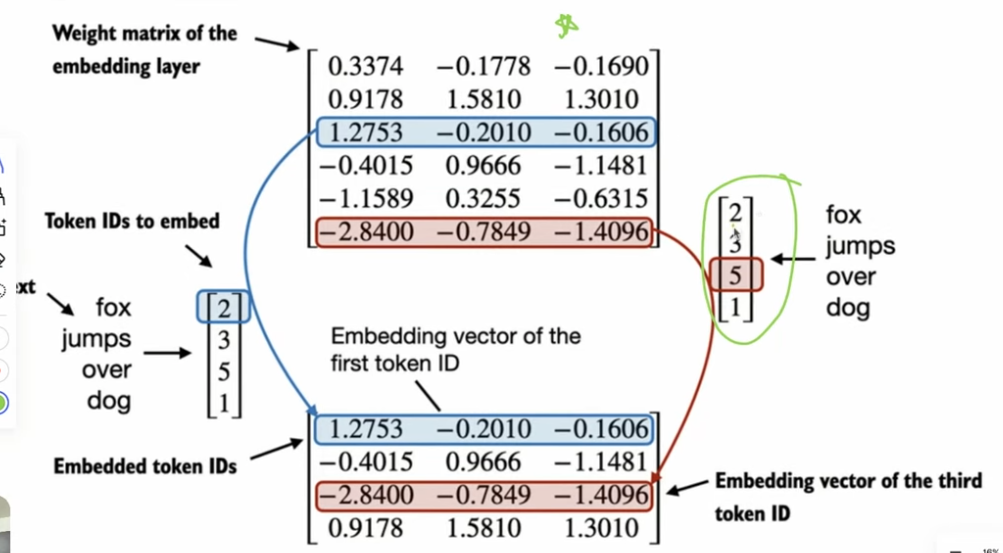

embedding-lay : just lookup operation

将token-id转成独热编码，token-size*token-size的矩阵

送入嵌入网络，目标vector有几维，就有几个神经元，也就是有几个神经元就转化到几维

结果是嵌入权重矩阵，后面lookup即可

# Positional Emdedding

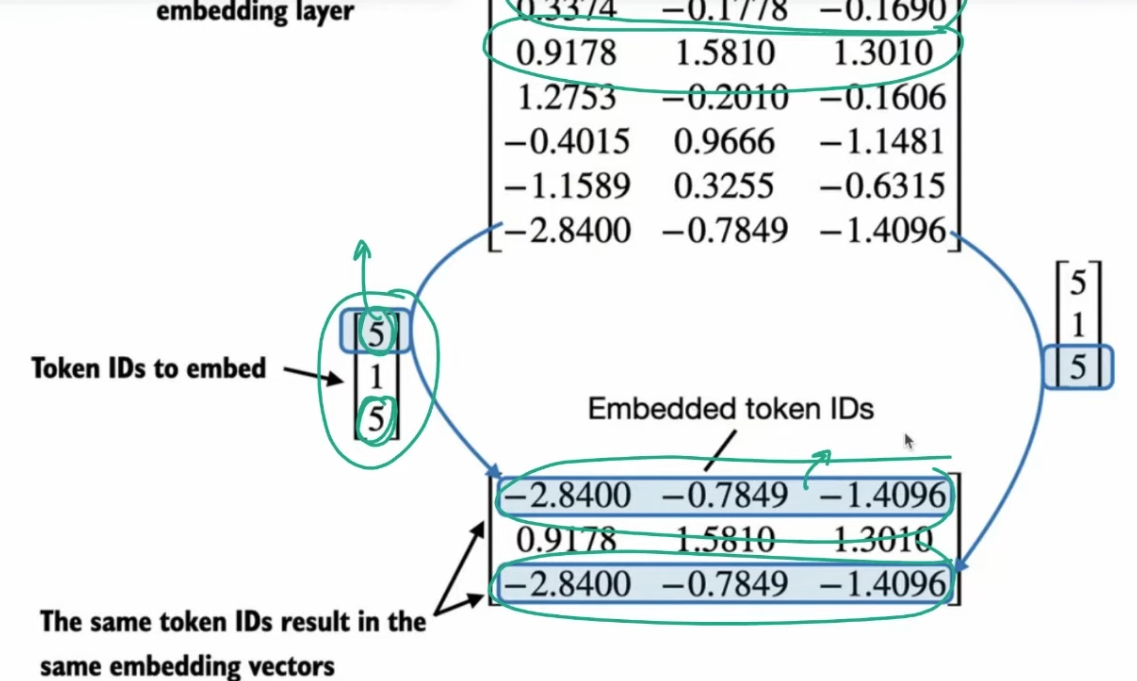

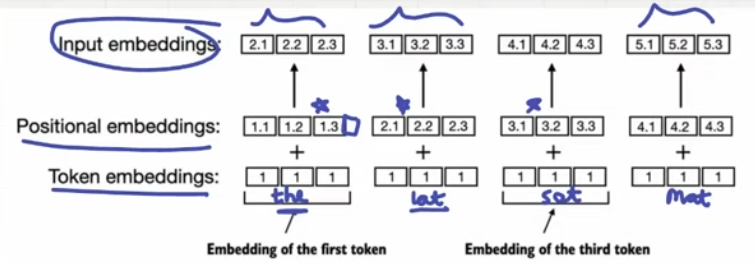

embedding size = vector dimension

Token IDs = vocabulary size

batch size = text samples

In [1]:
with open("data/the-verdict.txt", "r", encoding="utf-8") as f:
    raw_text = f.read()

In [2]:
import torch

vocab_size = 50257
output_dim = 256

token_embedding_layer = torch.nn.Embedding(vocab_size, output_dim)

In [3]:
from torch.utils.data import Dataset, DataLoader
import torch


class GPTDataSetV1(Dataset):
    def __init__(self, txt, tokenizer, max_length, stride):
        self.input_ids = []
        self.target_ids = []
    
        token_ids = tokenizer.encode(txt, allowed_special={"<|endoftext|>"})

        for i in range(0, len(token_ids) - max_length, stride):
            input_chunk = token_ids[i:i + max_length]
            target_chunk = token_ids[i + 1 : i + max_length +1]
            self.input_ids.append(torch.tensor(input_chunk))
            self.target_ids.append(torch.tensor(target_chunk))
        
    def __len__(self):
        return len(self.input_ids)
    
    def __getitem__(self, idx):
        return self.input_ids[idx], self.target_ids[idx]

In [4]:
import tiktoken

def create_dataloader_v1(txt, batch_size=4, max_length=256,
                         stride=128, shuffle=True, drop_last=True,
                         num_workers=0):
    tokenizer = tiktoken.get_encoding("gpt2")

    dataset = GPTDataSetV1(txt, tokenizer, max_length, stride)

    dataloader = DataLoader(
        dataset,
        batch_size = batch_size,
        shuffle = shuffle,
        drop_last = drop_last,
        num_workers = num_workers
    )

    return dataloader

In [ ]:
max_length = 4
data_loader = create_dataloader_v1(
    raw_text, batch_size=8, max_length=max_length,
    stride=max_length, shuffle=False
)

data_iter = iter(data_loader)
inputs, targets = next(data_iter)

print("Token IDs:\n", inputs)
print("\nTargets:\n", targets)

print("\n Input shape:", inputs.shape)

Token IDs:
 tensor([[   40,   367,  2885,  1464],
        [ 1807,  3619,   402,   271],
        [10899,  2138,   257,  7026],
        [15632,   438,  2016,   257],
        [  922,  5891,  1576,   438],
        [  568,   340,   373,   645],
        [ 1049,  5975,   284,   502],
        [  284,  3285,   326,    11]])

Target:
 tensor([[  367,  2885,  1464,  1807],
        [ 3619,   402,   271, 10899],
        [ 2138,   257,  7026, 15632],
        [  438,  2016,   257,   922],
        [ 5891,  1576,   438,   568],
        [  340,   373,   645,  1049],
        [ 5975,   284,   502,   284],
        [ 3285,   326,    11,   287]])

 Input shape: torch.Size([8, 4])


<div class="alert alert-block alert-success">
<b>

每个TokenID都转化成256维的语义向量

8 × 4 × 256

50257(one-hot) --> 256(semantic vecyor)
</div>

In [8]:
token_embeddings = token_embedding_layer(inputs)
print(token_embeddings.shape)

torch.Size([8, 4, 256])


<div class="alert alert-block alert-success">
<b>

positional embedding 和 token embedding的example形状应该相同

4 × 256

token embedding [8, 4, 256] 广播 positional embedding [4, 456]
</div>

In [12]:
context_length =  max_length
pos_embedding_layer = torch.nn.Embedding(context_length, output_dim)
pos_embeddings = pos_embedding_layer(torch.arange(max_length))
print(pos_embeddings)

tensor([[ 7.0693e-02,  5.5018e-02, -7.1159e-02,  ...,  1.1019e+00,
         -8.2702e-05,  8.8117e-01],
        [-5.7745e-01, -4.4898e-01, -4.4617e-01,  ..., -9.6010e-01,
          3.5961e-01, -7.7229e-01],
        [-3.1604e-01,  2.4935e+00,  1.7959e+00,  ...,  1.0610e-01,
          1.9772e+00,  3.5375e-01],
        [-4.1621e-01,  1.4904e-01,  9.6774e-01,  ..., -8.9228e-01,
          3.7763e-01,  8.0496e-01]], grad_fn=<EmbeddingBackward0>)
